<a href="https://colab.research.google.com/github/SAHIL9581/LIVE-AI-CLASSES/blob/main/Boston_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv("HousingData.csv")

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


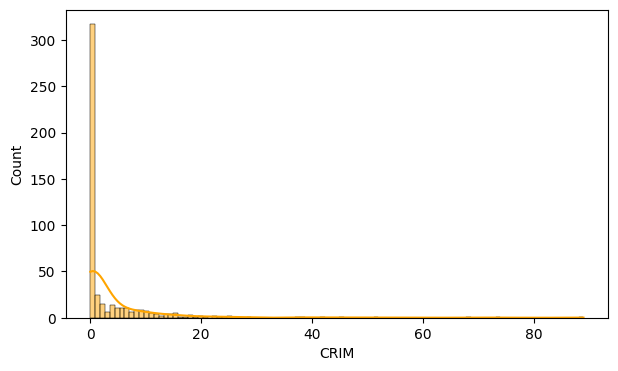

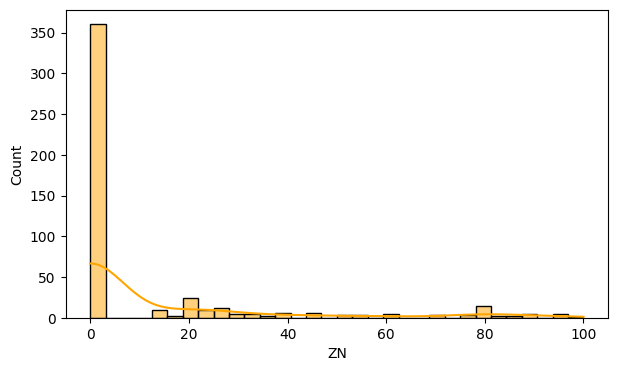

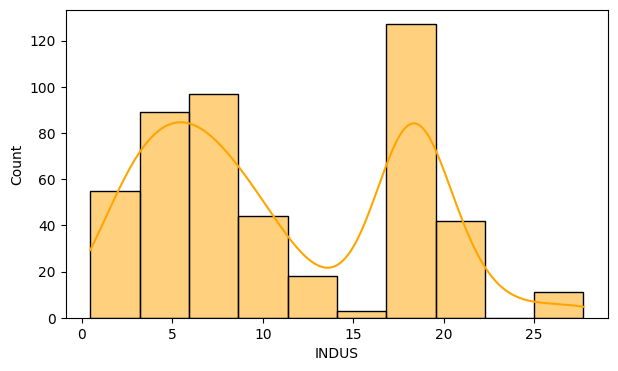

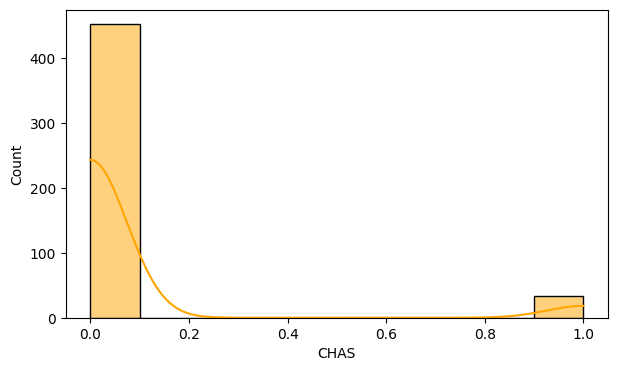

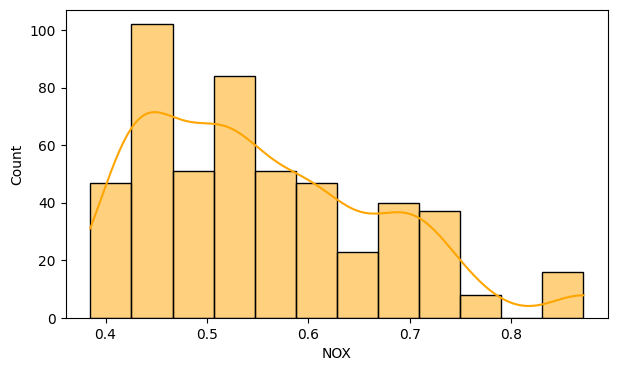

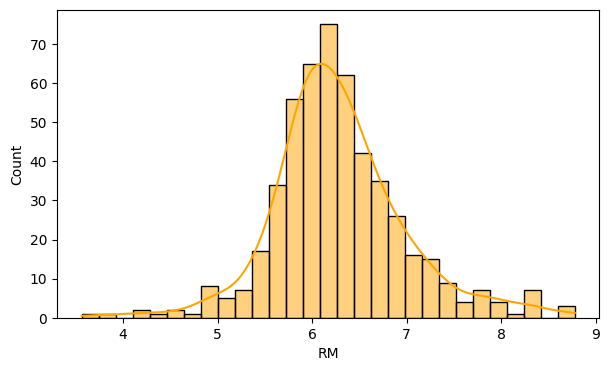

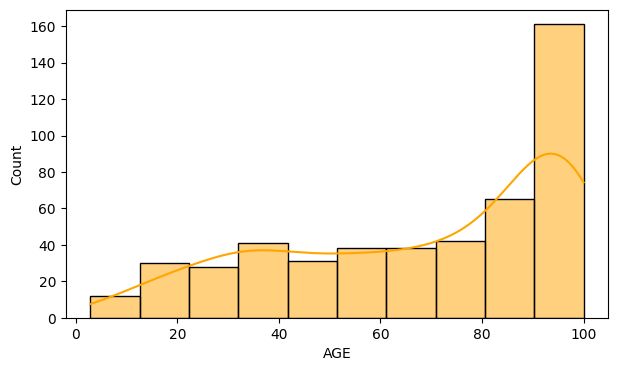

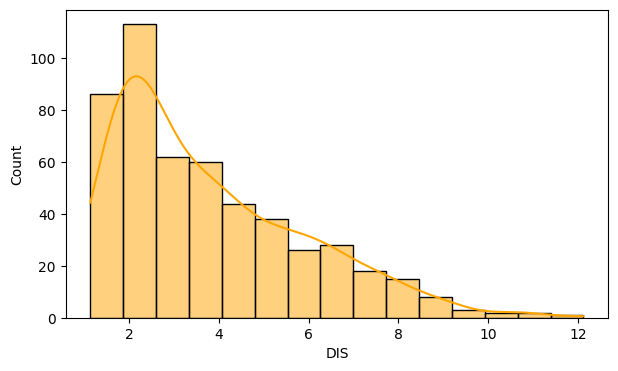

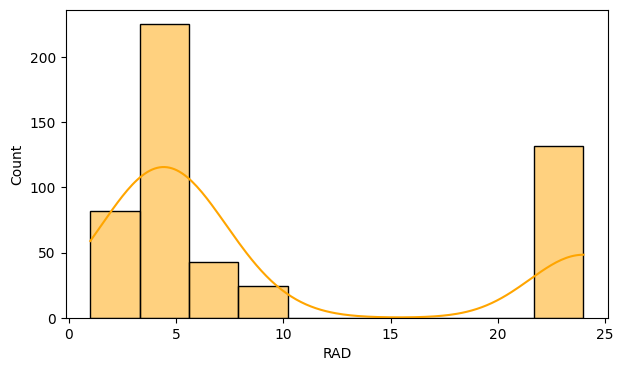

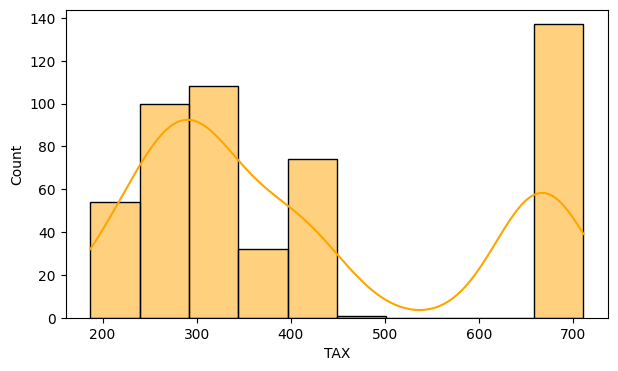

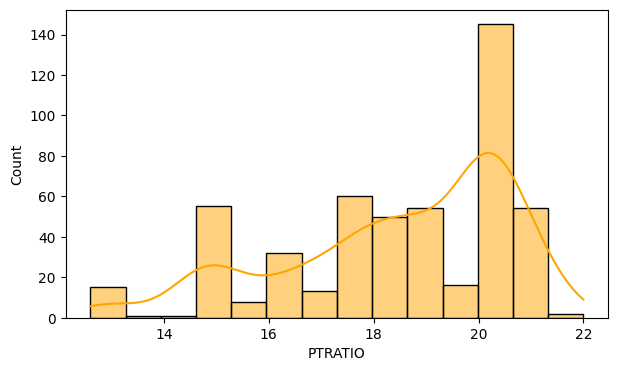

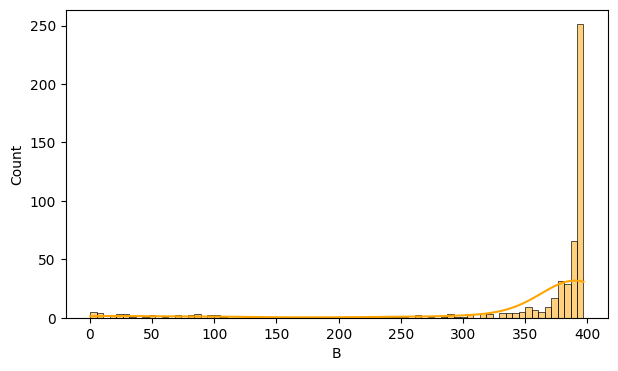

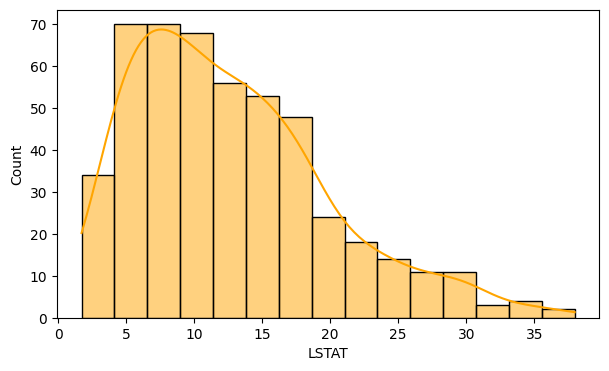

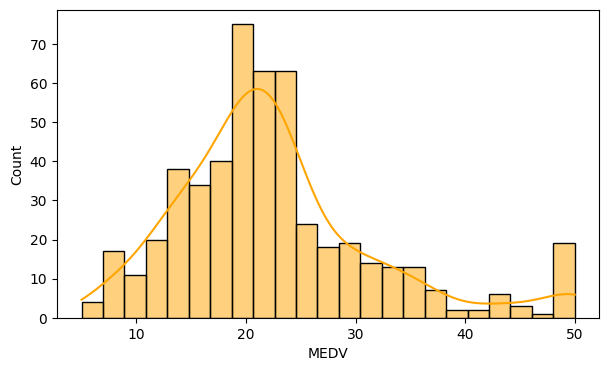

In [ ]:
for i in df.columns:

    plt.figure(figsize = (7, 4))

    sns.histplot(data=df, x=i, kde=True, color='orange')

    plt.show()

In [ ]:
df['MEDV_log'] = np.log(df['MEDV'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

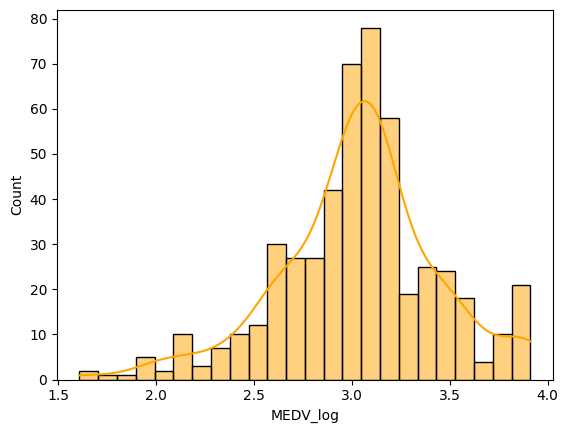

In [ ]:
sns.histplot(data = df, x = 'MEDV_log', kde = True, color='orange')

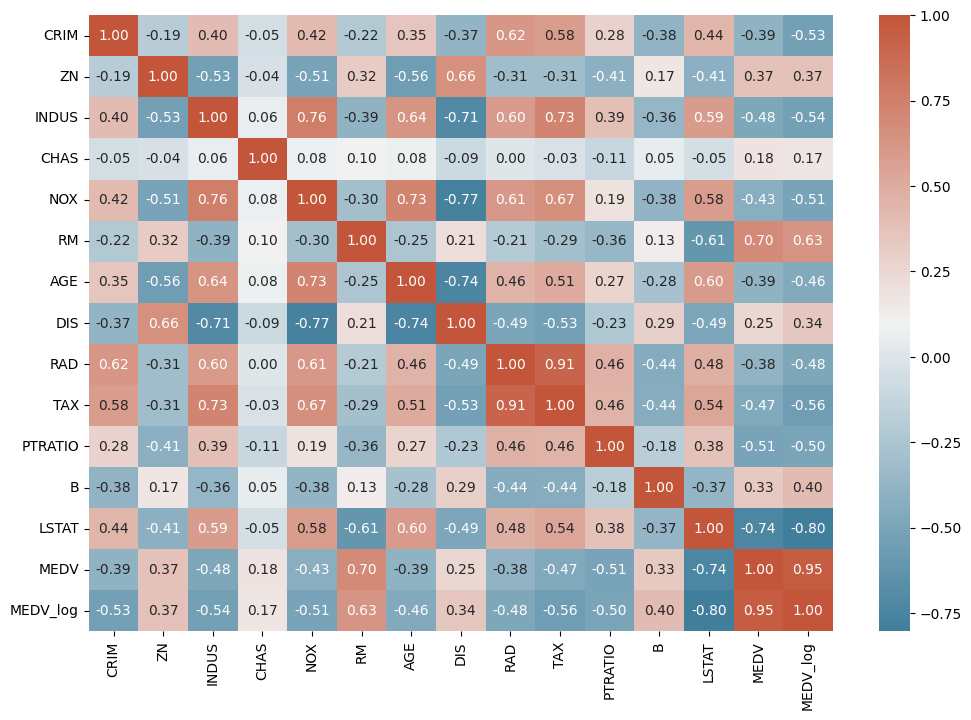

In [ ]:
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap, color='orange')

plt.show()

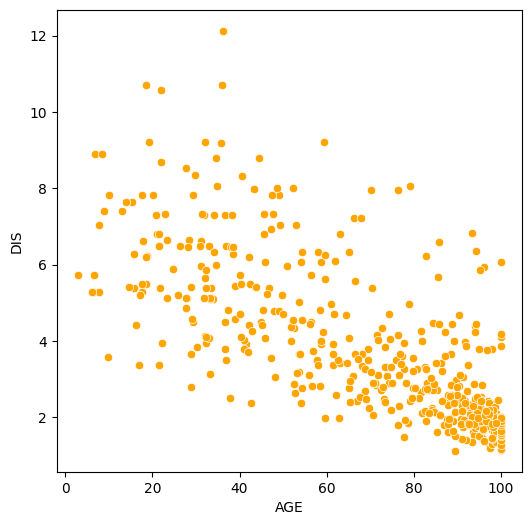

In [ ]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'DIS', data = df, color='orange')

plt.show()

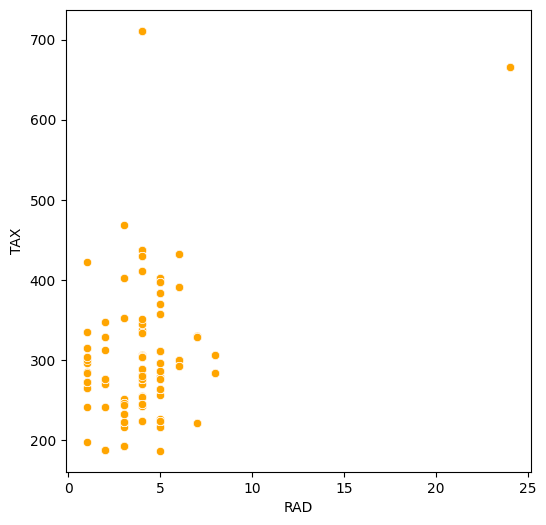

In [ ]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RAD', y = 'TAX', data = df, color='orange')

plt.show()

In [ ]:
# Remove the data corresponding to high tax rate
df1 = df[df['TAX'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['TAX'], df1['RAD'])[0])

The correlation between TAX and RAD is 0.24975731331429196


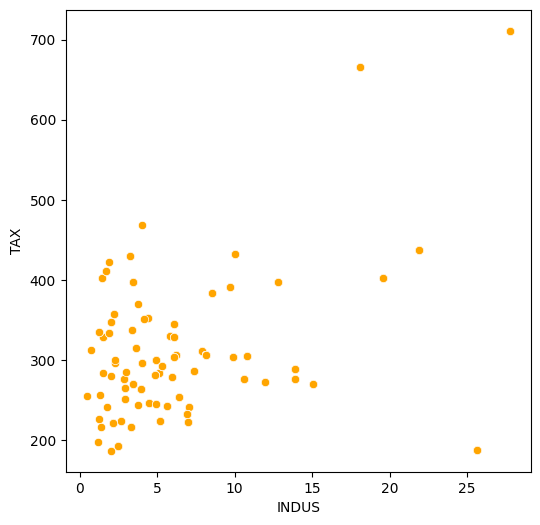

In [ ]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'TAX', data = df, color='orange')

plt.show()

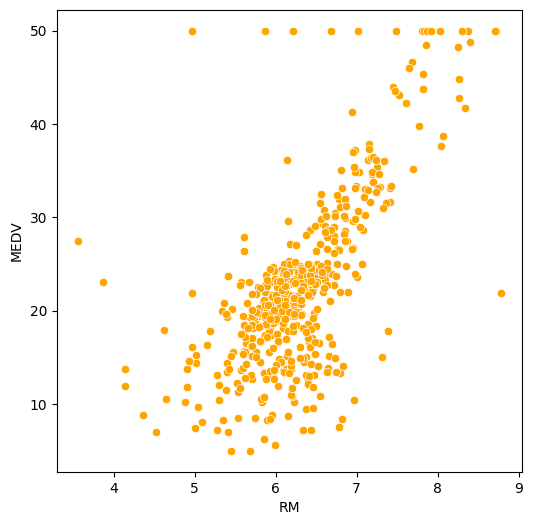

In [ ]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'RM', y = 'MEDV', data = df, color='orange')

plt.show()

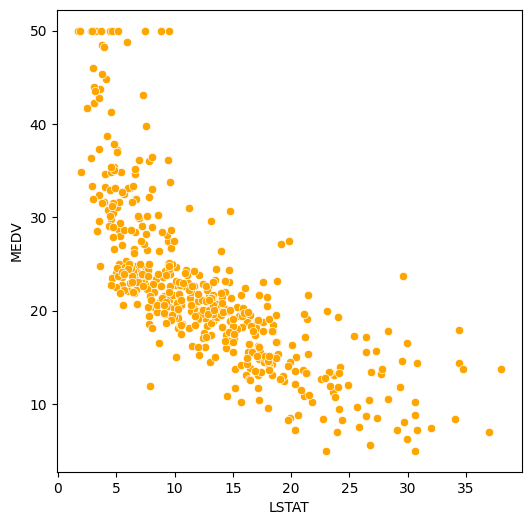

In [ ]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'LSTAT', y = 'MEDV', data = df, color='orange')

plt.show()

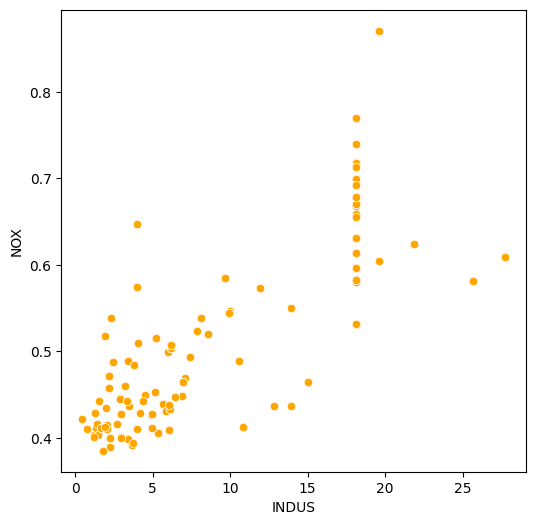

In [ ]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'INDUS', y = 'NOX', data = df, color='orange')

plt.show()

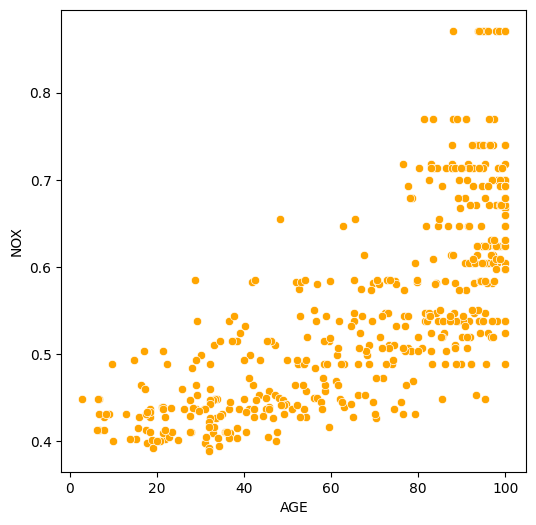

In [ ]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'AGE', y = 'NOX', data = df, color='orange')

plt.show()

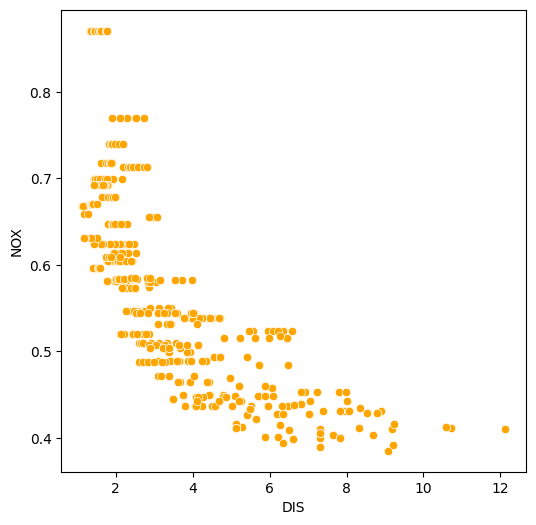

In [ ]:
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df, color='orange')

plt.show()

In [ ]:
Y = df['MEDV_log']

X = df.drop(columns = {'MEDV', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

# Before calculating VIF, handle missing or infinite values in X_train
X_train = X_train.replace([np.inf, -np.inf], np.nan) # Replace infinite values with NaN
X_train = X_train.fillna(X_train.mean())            # Impute NaN values with the mean of each column


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

    feature         VIF
0     const  580.482706
1      CRIM    1.929064
2        ZN    2.630022
3     INDUS    3.771206
4      CHAS    1.074302
5       NOX    4.203014
6        RM    1.803491
7       AGE    2.732659
8       DIS    4.311883
9       RAD    8.316482
10      TAX   10.124694
11  PTRATIO    1.913922
12        B    1.392348
13    LSTAT    2.582412


In [ ]:
# Create the model after dropping TAX
X_train = X_train.drop(columns = 'TAX')

# Check for VIF
print(checking_vif(X_train))

    feature         VIF
0     const  578.410725
1      CRIM    1.926675
2        ZN    2.381615
3     INDUS    3.109464
4      CHAS    1.047368
5       NOX    4.155799
6        RM    1.802115
7       AGE    2.730926
8       DIS    4.297186
9       RAD    2.967597
10  PTRATIO    1.877674
11        B    1.392079
12    LSTAT    2.582375


In [ ]:
import statsmodels.api as sm
import pandas as pd

# Fit the model
model1 = sm.OLS(y_train, X_train).fit()

# Extract model summary as tables
summary_table = model1.summary2().tables[1]  # Coefficients table
display(summary_table)  # If using Jupyter Notebook or Google Colab

# OR if you want to print it nicely in plain Python
print(summary_table)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,4.472424,0.255942,17.474357,2.793737e-49,3.969000,4.975848
CRIM,-0.012823,0.001745,-7.348703,1.492271e-12,-0.016255,-0.009391
ZN,0.000975,0.000704,1.385365,1.668463e-01,-0.000409,0.002360
INDUS,-0.003053,0.002807,-1.087927,2.773957e-01,-0.008574,0.002467
CHAS,0.131614,0.039792,3.307553,1.041469e-03,0.053345,0.209882
NOX,-0.993747,0.184075,-5.398603,1.260817e-07,-1.355812,-0.631682
RM,0.069045,0.020654,3.342890,9.211825e-04,0.028419,0.109670
AGE,-0.000473,0.000643,-0.735576,4.624945e-01,-0.001738,0.000792
DIS,-0.056443,0.010336,-5.460654,9.155809e-08,-0.076774,-0.036112
RAD,0.007611,0.002086,3.649150,3.042920e-04,0.003509,0.011714


            Coef.  Std.Err.          t         P>|t|    [0.025    0.975]
const    4.472424  0.255942  17.474357  2.793737e-49  3.969000  4.975848
CRIM    -0.012823  0.001745  -7.348703  1.492271e-12 -0.016255 -0.009391
ZN       0.000975  0.000704   1.385365  1.668463e-01 -0.000409  0.002360
INDUS   -0.003053  0.002807  -1.087927  2.773957e-01 -0.008574  0.002467
CHAS     0.131614  0.039792   3.307553  1.041469e-03  0.053345  0.209882
NOX     -0.993747  0.184075  -5.398603  1.260817e-07 -1.355812 -0.631682
RM       0.069045  0.020654   3.342890  9.211825e-04  0.028419  0.109670
AGE     -0.000473  0.000643  -0.735576  4.624945e-01 -0.001738  0.000792
DIS     -0.056443  0.010336  -5.460654  9.155809e-08 -0.076774 -0.036112
RAD      0.007611  0.002086   3.649150  3.042920e-04  0.003509  0.011714
PTRATIO -0.044836  0.006801  -6.592223  1.648954e-10 -0.058214 -0.031458
B        0.000226  0.000139   1.625022  1.050818e-01 -0.000048  0.000500
LSTAT   -0.026298  0.002399 -10.961632  3.733469e-2

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Create the model
model2 = sm.OLS(y_train, X_train).fit()

# Extract and display the coefficients summary table
summary_table = model2.summary2().tables[1]

# If using Jupyter Notebook or Colab
display(summary_table)

# Or if you're using plain Python
print(summary_table)


,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,-4.218847e-15,7.990021e-15,-5.280146e-01,5.978326e-01,-1.993478e-14,1.149708e-14
CRIM,2.450297e-16,3.663554e-17,6.688305e+00,9.258568e-11,1.729696e-16,3.170898e-16
CHAS,1.101896e-14,7.168528e-16,1.537130e+01,7.014897e-41,9.608953e-15,1.242897e-14
NOX,-1.804112e-15,3.216614e-15,-5.608732e-01,5.752523e-01,-8.131015e-15,4.522790e-15
RM,6.938894e-17,3.880822e-16,1.787996e-01,8.582013e-01,-6.939475e-16,8.327254e-16
DIS,4.336809e-17,1.480406e-16,2.929473e-01,7.697406e-01,-2.478196e-16,3.345557e-16
RAD,-8.066464e-17,5.999189e-17,-1.344593e+00,1.796506e-01,-1.986654e-16,3.733611e-17
TAX,4.119968e-18,3.083432e-18,1.336163e+00,1.823869e-01,-1.944974e-18,1.018491e-17
PTRATIO,1.045171e-16,1.208198e-16,8.650661e-01,3.876107e-01,-1.331288e-16,3.421630e-16
B,6.547565e-18,2.455623e-18,2.666356e+00,8.033166e-03,1.717490e-18,1.137764e-17


                 Coef.      Std.Err.             t         P>|t|  \
const    -4.218847e-15  7.990021e-15 -5.280146e-01  5.978326e-01   
CRIM      2.450297e-16  3.663554e-17  6.688305e+00  9.258568e-11   
CHAS      1.101896e-14  7.168528e-16  1.537130e+01  7.014897e-41   
NOX      -1.804112e-15  3.216614e-15 -5.608732e-01  5.752523e-01   
RM        6.938894e-17  3.880822e-16  1.787996e-01  8.582013e-01   
DIS       4.336809e-17  1.480406e-16  2.929473e-01  7.697406e-01   
RAD      -8.066464e-17  5.999189e-17 -1.344593e+00  1.796506e-01   
TAX       4.119968e-18  3.083432e-18  1.336163e+00  1.823869e-01   
PTRATIO   1.045171e-16  1.208198e-16  8.650661e-01  3.876107e-01   
B         6.547565e-18  2.455623e-18  2.666356e+00  8.033166e-03   
LSTAT    -4.683753e-17  4.827451e-17 -9.702333e-01  3.326179e-01   
MEDV     -3.816392e-17  8.630740e-17 -4.421859e-01  6.586350e-01   
MEDV_log  1.000000e+00  2.194367e-15  4.557123e+14  0.000000e+00   

                [0.025        0.975]  
const   

In [ ]:
residuals = model2.resid

np.mean(residuals)

np.float64(7.307400133832245e-16)

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', np.float64(0.013414679981376385)),
 ('p-value', np.float64(0.9999999999999999))]

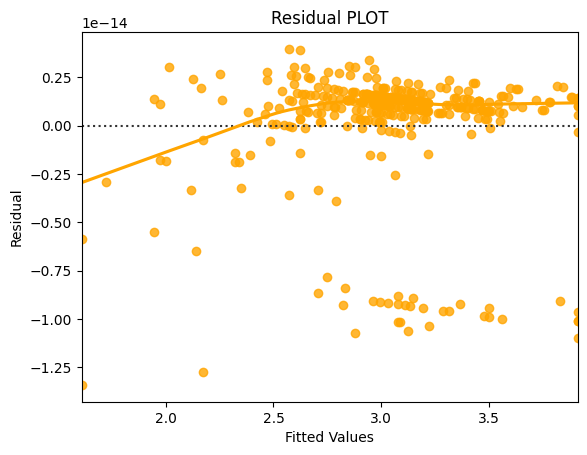

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "orange", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

<Axes: ylabel='Count'>

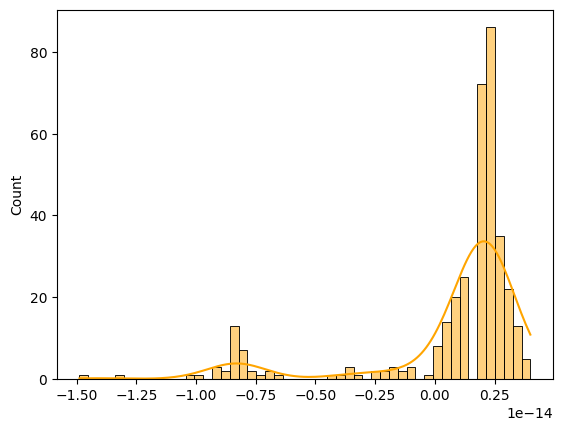

In [ ]:
# Plot histogram of residuals

sns.histplot(residuals, kde = True, color = "orange")

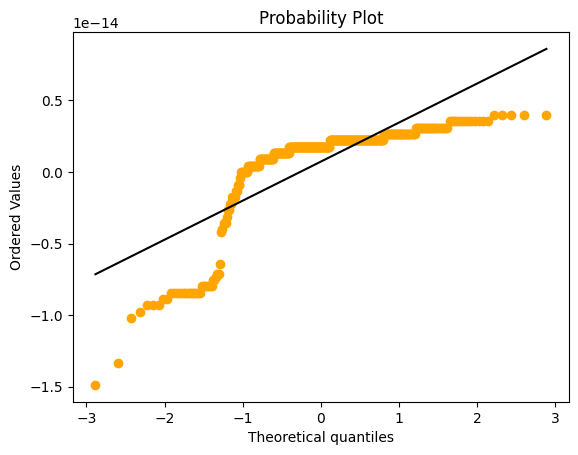

In [ ]:
# Plot q-q plot of residuals
import pylab
import scipy.stats as stats
import matplotlib.pyplot as plt

# Create the plot
fig = plt.figure()
ax = fig.add_subplot(111)

stats.probplot(residuals, dist="norm", plot=ax)

# Change line to black and points to orange
for line in ax.get_lines():
    if line.get_linestyle() == 'None':  # Points
        line.set_color('orange')
    else:  # The diagonal line
        line.set_color('black')

plt.show()


In [ ]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

## R2
from sklearn.metrics import r2_score


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data          RMSE           MAE          MAPE   r2
0  Train  3.460991e-15  2.682725e-15  9.029806e-14  1.0
1   Test  3.179858e-15  2.452716e-15  8.059009e-14  1.0


In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 1.000 (+/- 0.000)
Mean Squared Error: 0.000 (+/- 0.000)


In [ ]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,-4.218847e-15
1,CRIM,2.450297e-16
2,CHAS,1.101896e-14
3,NOX,-1.804112e-15
4,RM,6.938894e-17
5,DIS,4.336809e-17
6,RAD,-8.066464e-17
7,TAX,4.119968e-18
8,PTRATIO,1.045171e-16
9,B,6.547565e-18


In [ ]:
# Let us write the equation of the fit

Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) = 	( -4.218847493575595e-15 ) *  const + ( 2.45029690981724e-16 ) *  CRIM + ( 1.1018963519404679e-14 ) *  CHAS + ( -1.8041124150158794e-15 ) *  NOX + ( 6.938893903907228e-17 ) *  RM + ( 4.336808689942018e-17 ) *  DIS + ( -8.066464163292153e-17 ) *  RAD + ( 4.119968255444917e-18 ) *  TAX + ( 1.0451708942760263e-16 ) *  PTRATIO + ( 6.547564682275742e-18 ) *  B + ( -4.683753385137379e-17 ) *  LSTAT + ( -3.8163916471489756e-17 ) *  MEDV + ( 0.9999999999999994 ) *  MEDV_log + 